In [1]:
import numpy as np
import struct as st
import matplotlib.pyplot as plt

In [2]:
path = [
    '/kaggle/input/mnist-data/train-images.idx3-ubyte',
    '/kaggle/input/mnist-data/train-labels.idx1-ubyte',
    '/kaggle/input/mnist-data/t10k-images.idx3-ubyte',
    '/kaggle/input/mnist-data/t10k-labels.idx1-ubyte']

# 1. Read Image Data and Labels

## 1.1 Normalization

In [3]:
# Image Data Binaryization
def normalize(data):
    data[data != 0] = 1

## 1.2 Read Image Data

In [4]:
# Read Image Data
def read_idx3(path):
    offset = 0  # 定义偏移量
    fmt_header = ">4i"  # 定义类型idx3前面有4个整型
    raw_bin_data = open(path, "rb").read()  # 读入字节数据
    magic_number, num_images, num_rows, num_cols = st.unpack_from(fmt_header, raw_bin_data, offset)
    image_size = num_rows * num_cols
    offset += st.calcsize(fmt_header)
    fmt_image = ">" + str(image_size) + "B"
    images = np.empty((num_images, num_rows, num_cols))  # 返回一个空矩阵
    for i in range(num_images):
        images[i] = np.array(st.unpack_from(fmt_image, raw_bin_data, offset)).reshape((num_rows, num_cols))
        # 二值化图像矩阵
        normalize(images[i])
        offset += st.calcsize(fmt_image)
 
    return images

## 1.3 Read Image Labels

In [5]:
# Read Image Labels
def read_idx1(path):
    offset = 0  # 定义偏移量
    fmt_header = ">2i"  # 定义类型 idx1前面有2个整型
    raw_bin_data = open(path, "rb").read()  # 读入字节数据
    magic_number, num_images = st.unpack_from(fmt_header, raw_bin_data, offset)
    offset += st.calcsize(fmt_header)
    fmt_image = ">B"
    labels = np.empty(num_images)  # 返回一个空矩阵
    for i in range(num_images):
        labels[i] = st.unpack_from(fmt_image, raw_bin_data, offset)[0]
        offset += st.calcsize(fmt_image)
    labels = [int(i) for i in labels]
 
    return labels

# 2. Read Train and Test Data (train:test = 6:1)

In [6]:
def read_train_and_test(train_imgs_path, train_labels_path, test_imgs_path, test_labels_path):
    # 读入 训练集6w 的 idx3文件
    train_imgs = read_idx3(train_imgs_path)
    # 读入 训练集6w 的 idx1文件
    train_labels = read_idx1(train_labels_path)
    # 读入 测试集1w 的 idx3文件
    test_imgs = read_idx3(test_imgs_path)
    # 读入 测试集1w 的 idx1文件
    test_labels = read_idx1(test_labels_path)
    normalize(train_imgs)
    normalize(test_imgs)
    return train_imgs, train_labels, test_imgs, test_labels

In [7]:
train_imgs, train_labels, test_imgs, test_labels = read_train_and_test(path[0], path[1], path[2], path[3])

### Train Images Shape

In [8]:
train_imgs.shape

(60000, 28, 28)

### Test Images Shape

In [9]:
test_imgs.shape

(10000, 28, 28)

# 3. Show Image After Feature Zooming (i.e. Normalization)

In [10]:
def show_img(imgs):
    m, r, c = imgs.shape
    t_img = np.zeros((1, 8 * c + 2))
    for i in range(8):
        t = np.zeros((r, 1))
        for j in range(8):
            t = np.hstack((t, imgs[i*8+j]))
        t = np.hstack((t, np.zeros((r, 1))))
        t_img = np.vstack((t_img, t))
    t_img = np.vstack((t_img, np.zeros((1, 8 * c + 2))))
    plt.imshow(t_img)
    plt.show()

## 3.1 Show Train Data

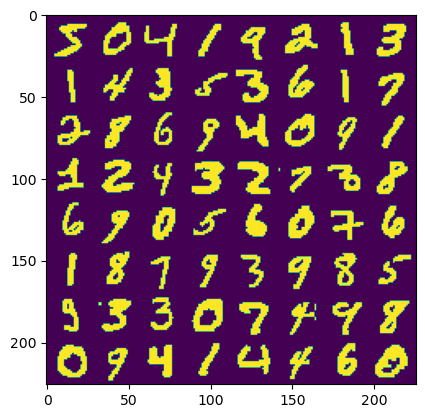

In [11]:
show_img(train_imgs)

## 3.2 Show Test Data

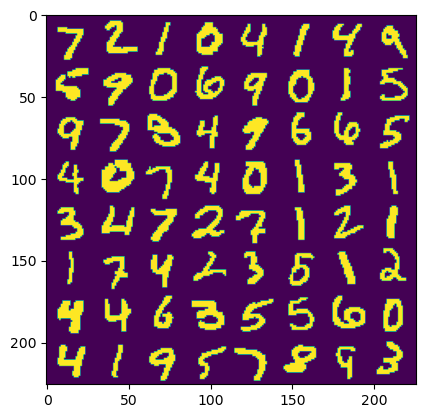

In [12]:
show_img(test_imgs)

# 4. Construct Support Vector Machine Model

## 4.1 Transform 3D Image Data to 2D

This is because `svm.SVC` only support data of 2D.

In [13]:
train_imgs_2D = (train_imgs.reshape(train_imgs.shape[0], train_imgs.shape[1] * train_imgs.shape[2]))
test_imgs_2D = (test_imgs.reshape(test_imgs.shape[0], test_imgs.shape[1] * test_imgs.shape[2]))

train_imgs_2D.shape

test_imgs_2D.shape

(10000, 784)

## 4.2 Construct Models Using Different Kernels and Evaluate on the Test Data

In [14]:
from time import time
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

The training time of using linear kernel is 214.64 sec.

The score of using linear kernel is 92.66%.

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       980
           1       0.97      0.98      0.97      1135
           2       0.90      0.93      0.91      1032
           3       0.88      0.92      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.90      0.88      0.89       892
           6       0.96      0.94      0.95       958
           7       0.95      0.92      0.94      1028
           8       0.91      0.88      0.90       974
           9       0.93      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



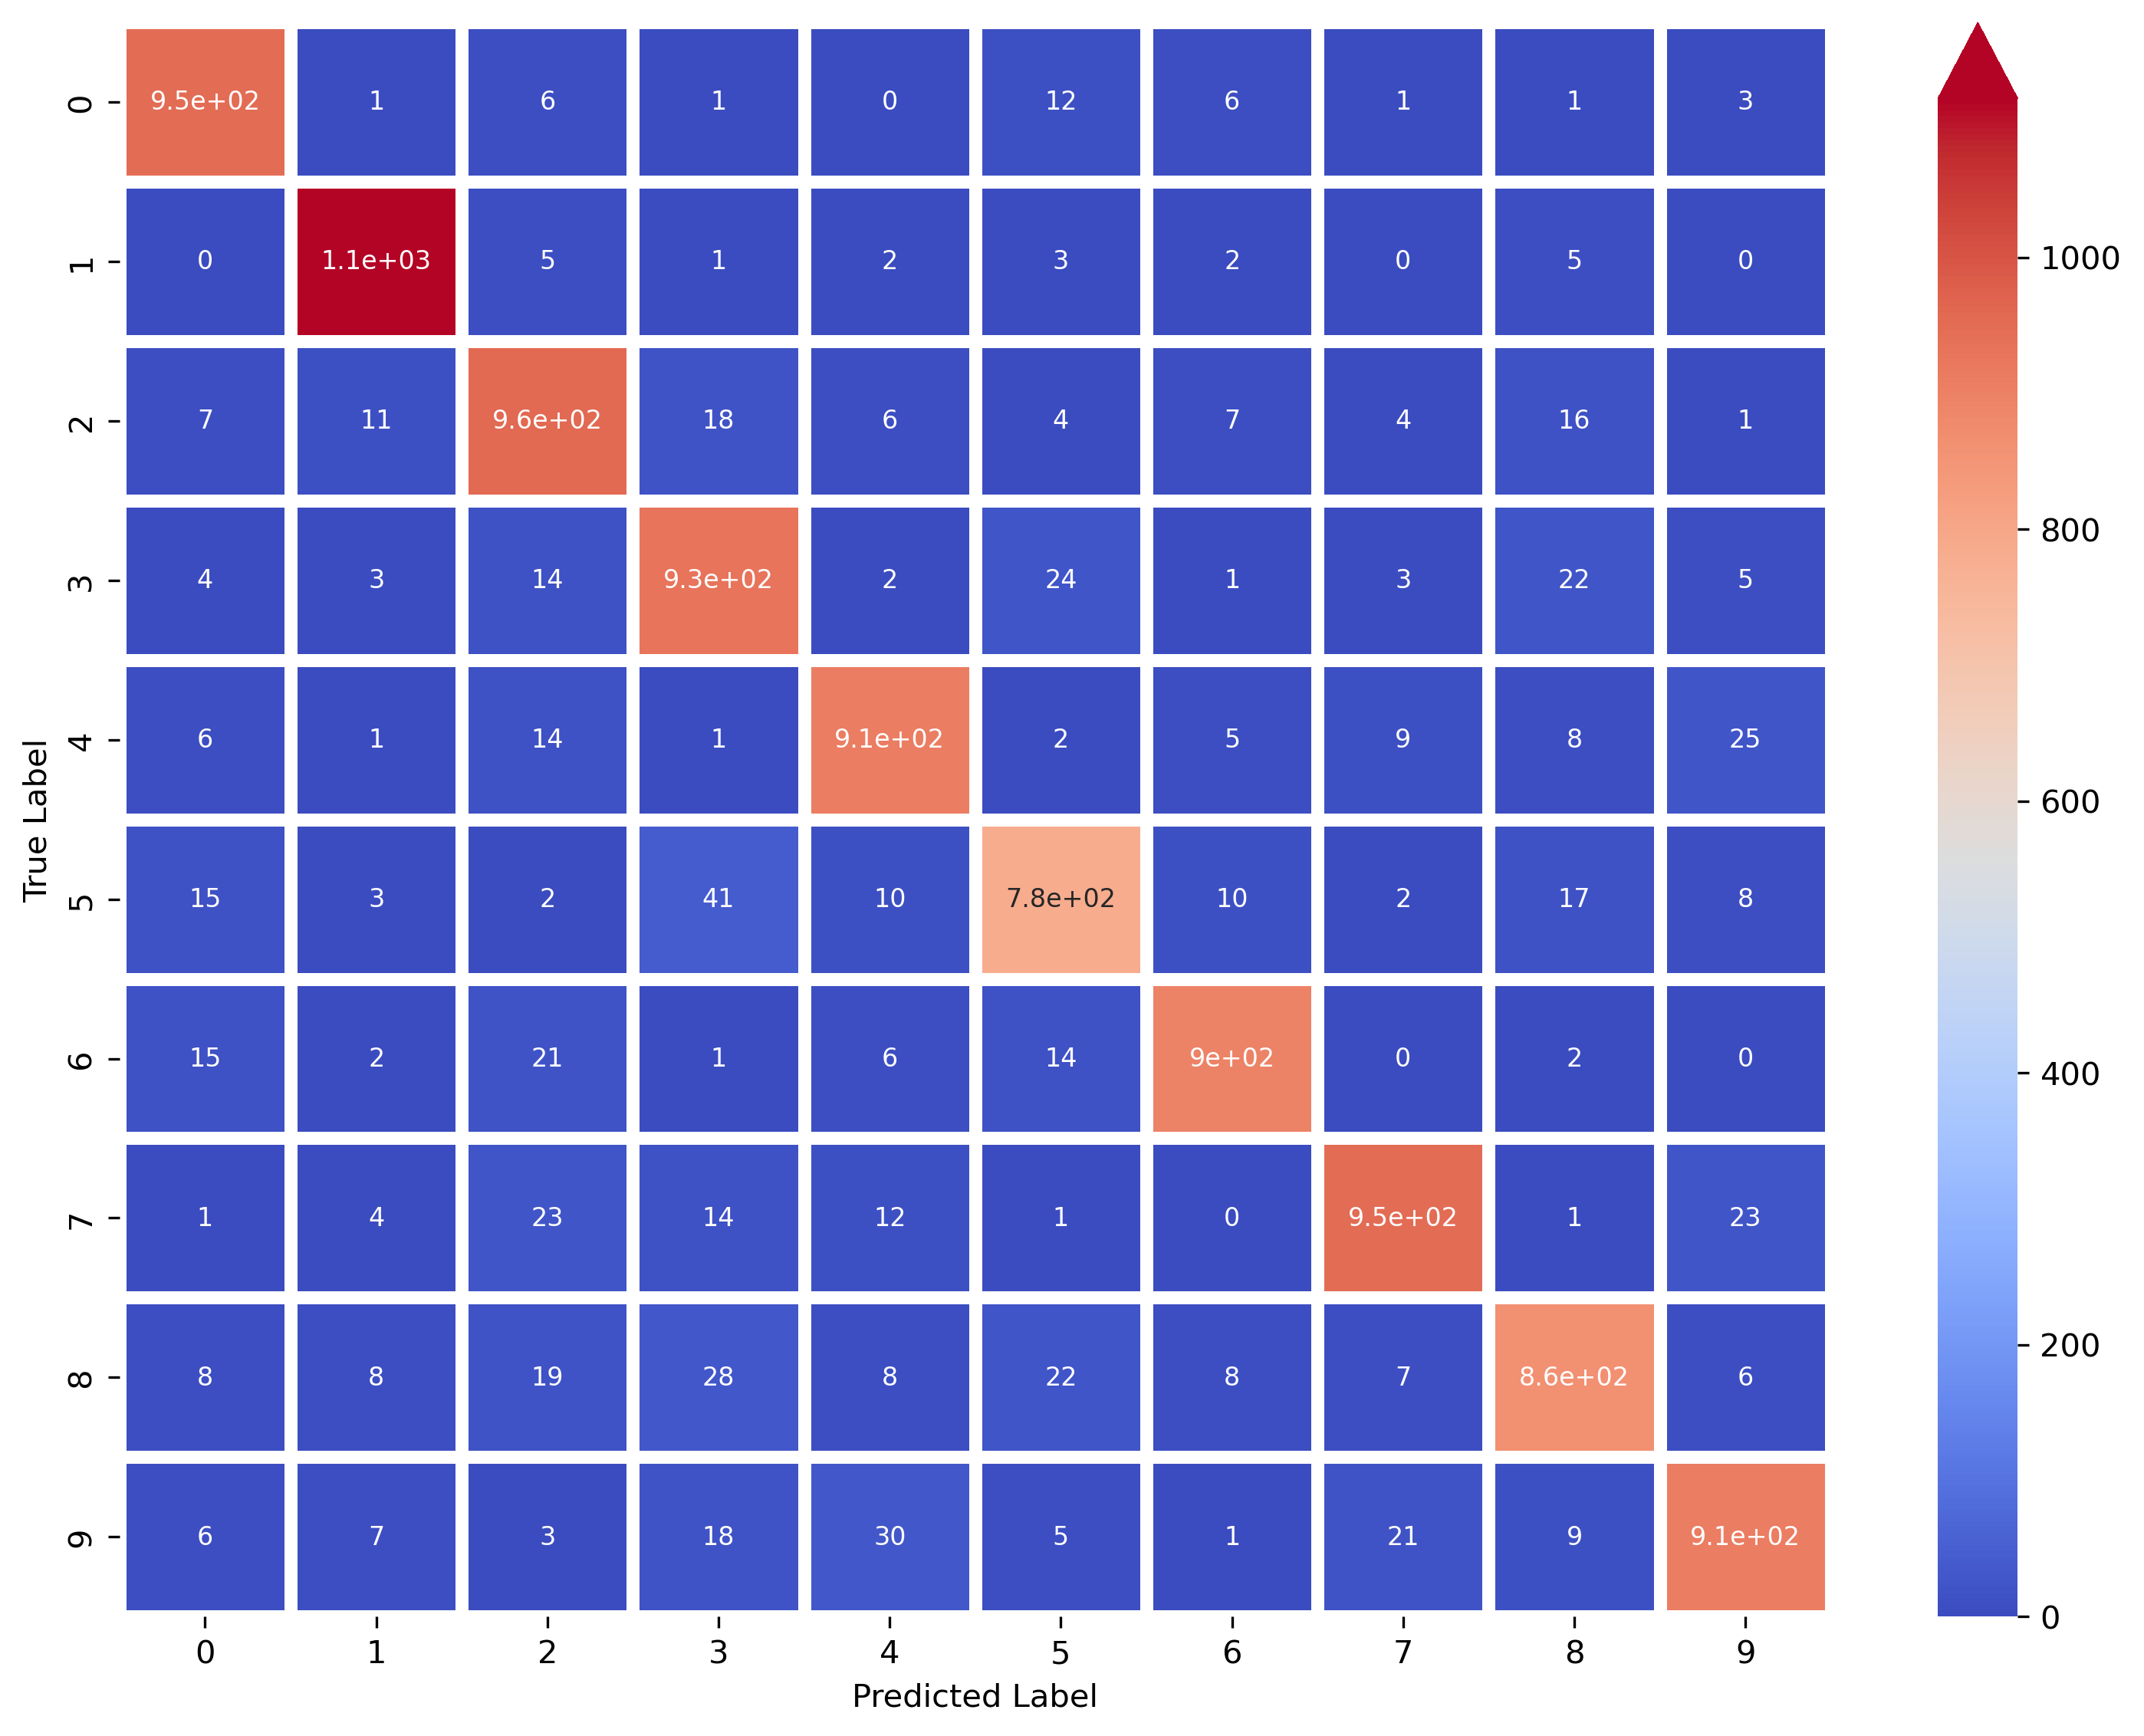

The training time of using poly kernel is 153.25 sec.

The score of using poly kernel is 97.94%.

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



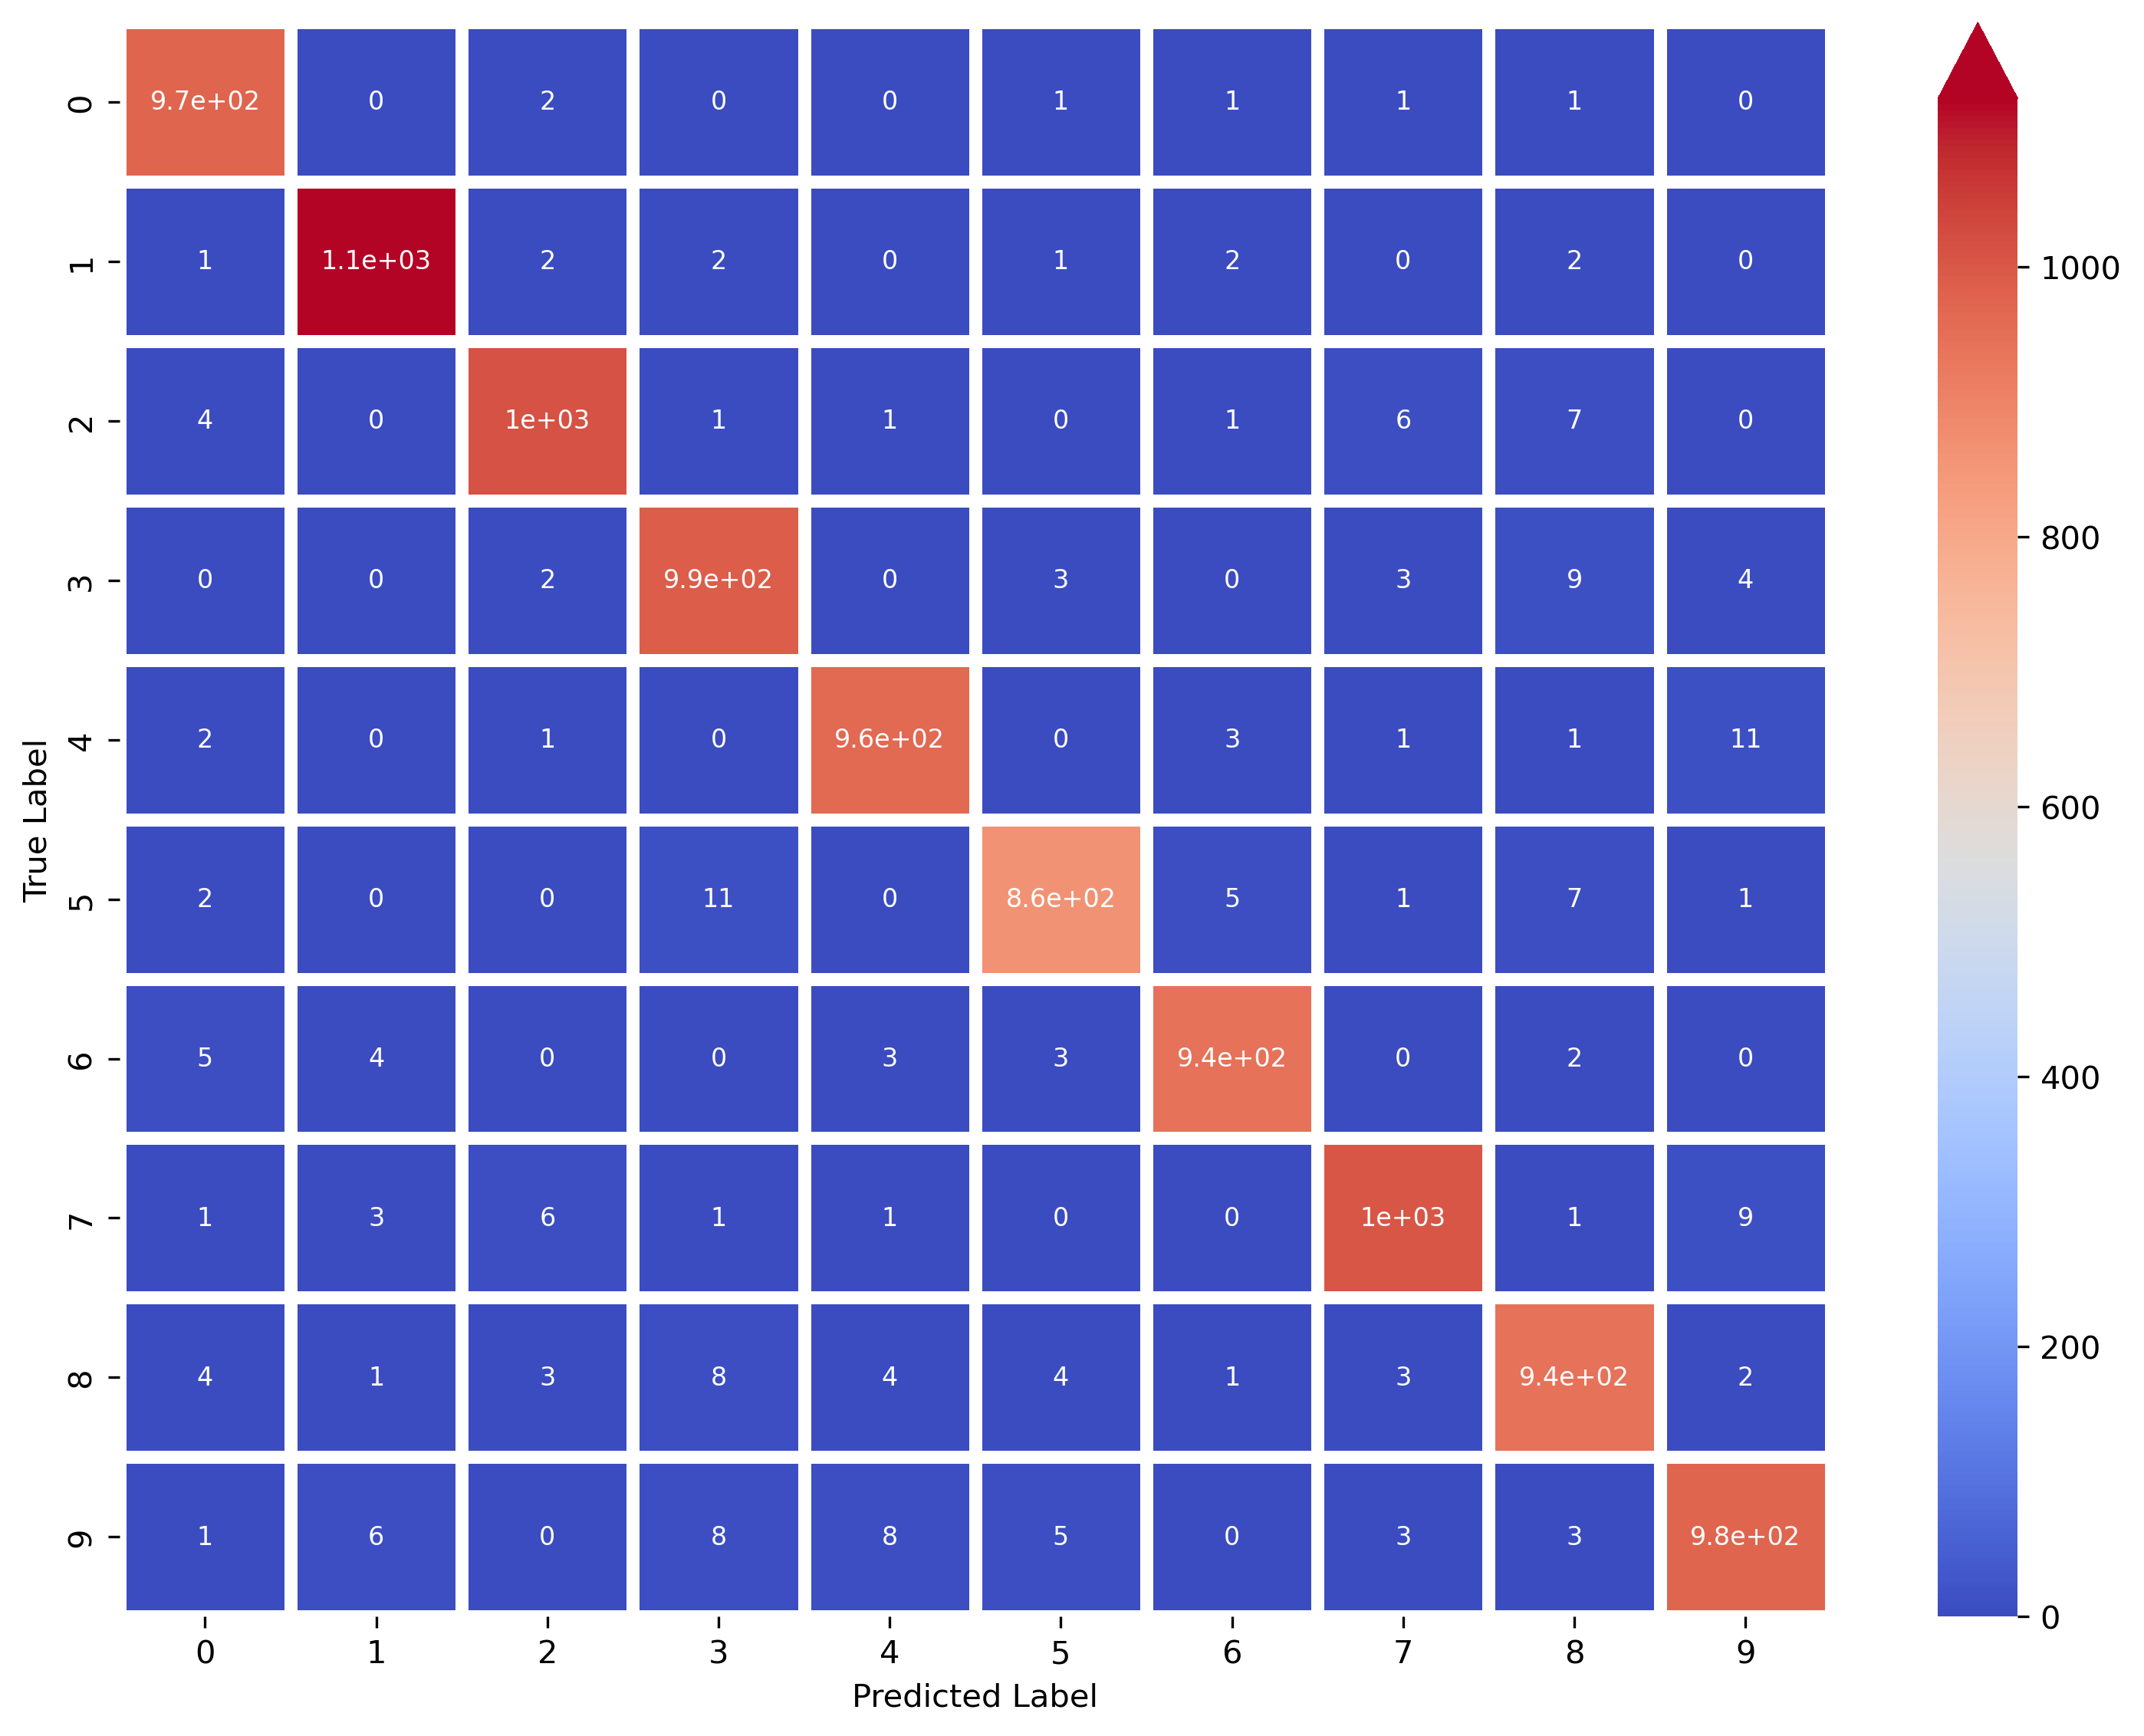

The training time of using rbf kernel is 189.13 sec.

The score of using rbf kernel is 97.56%.

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



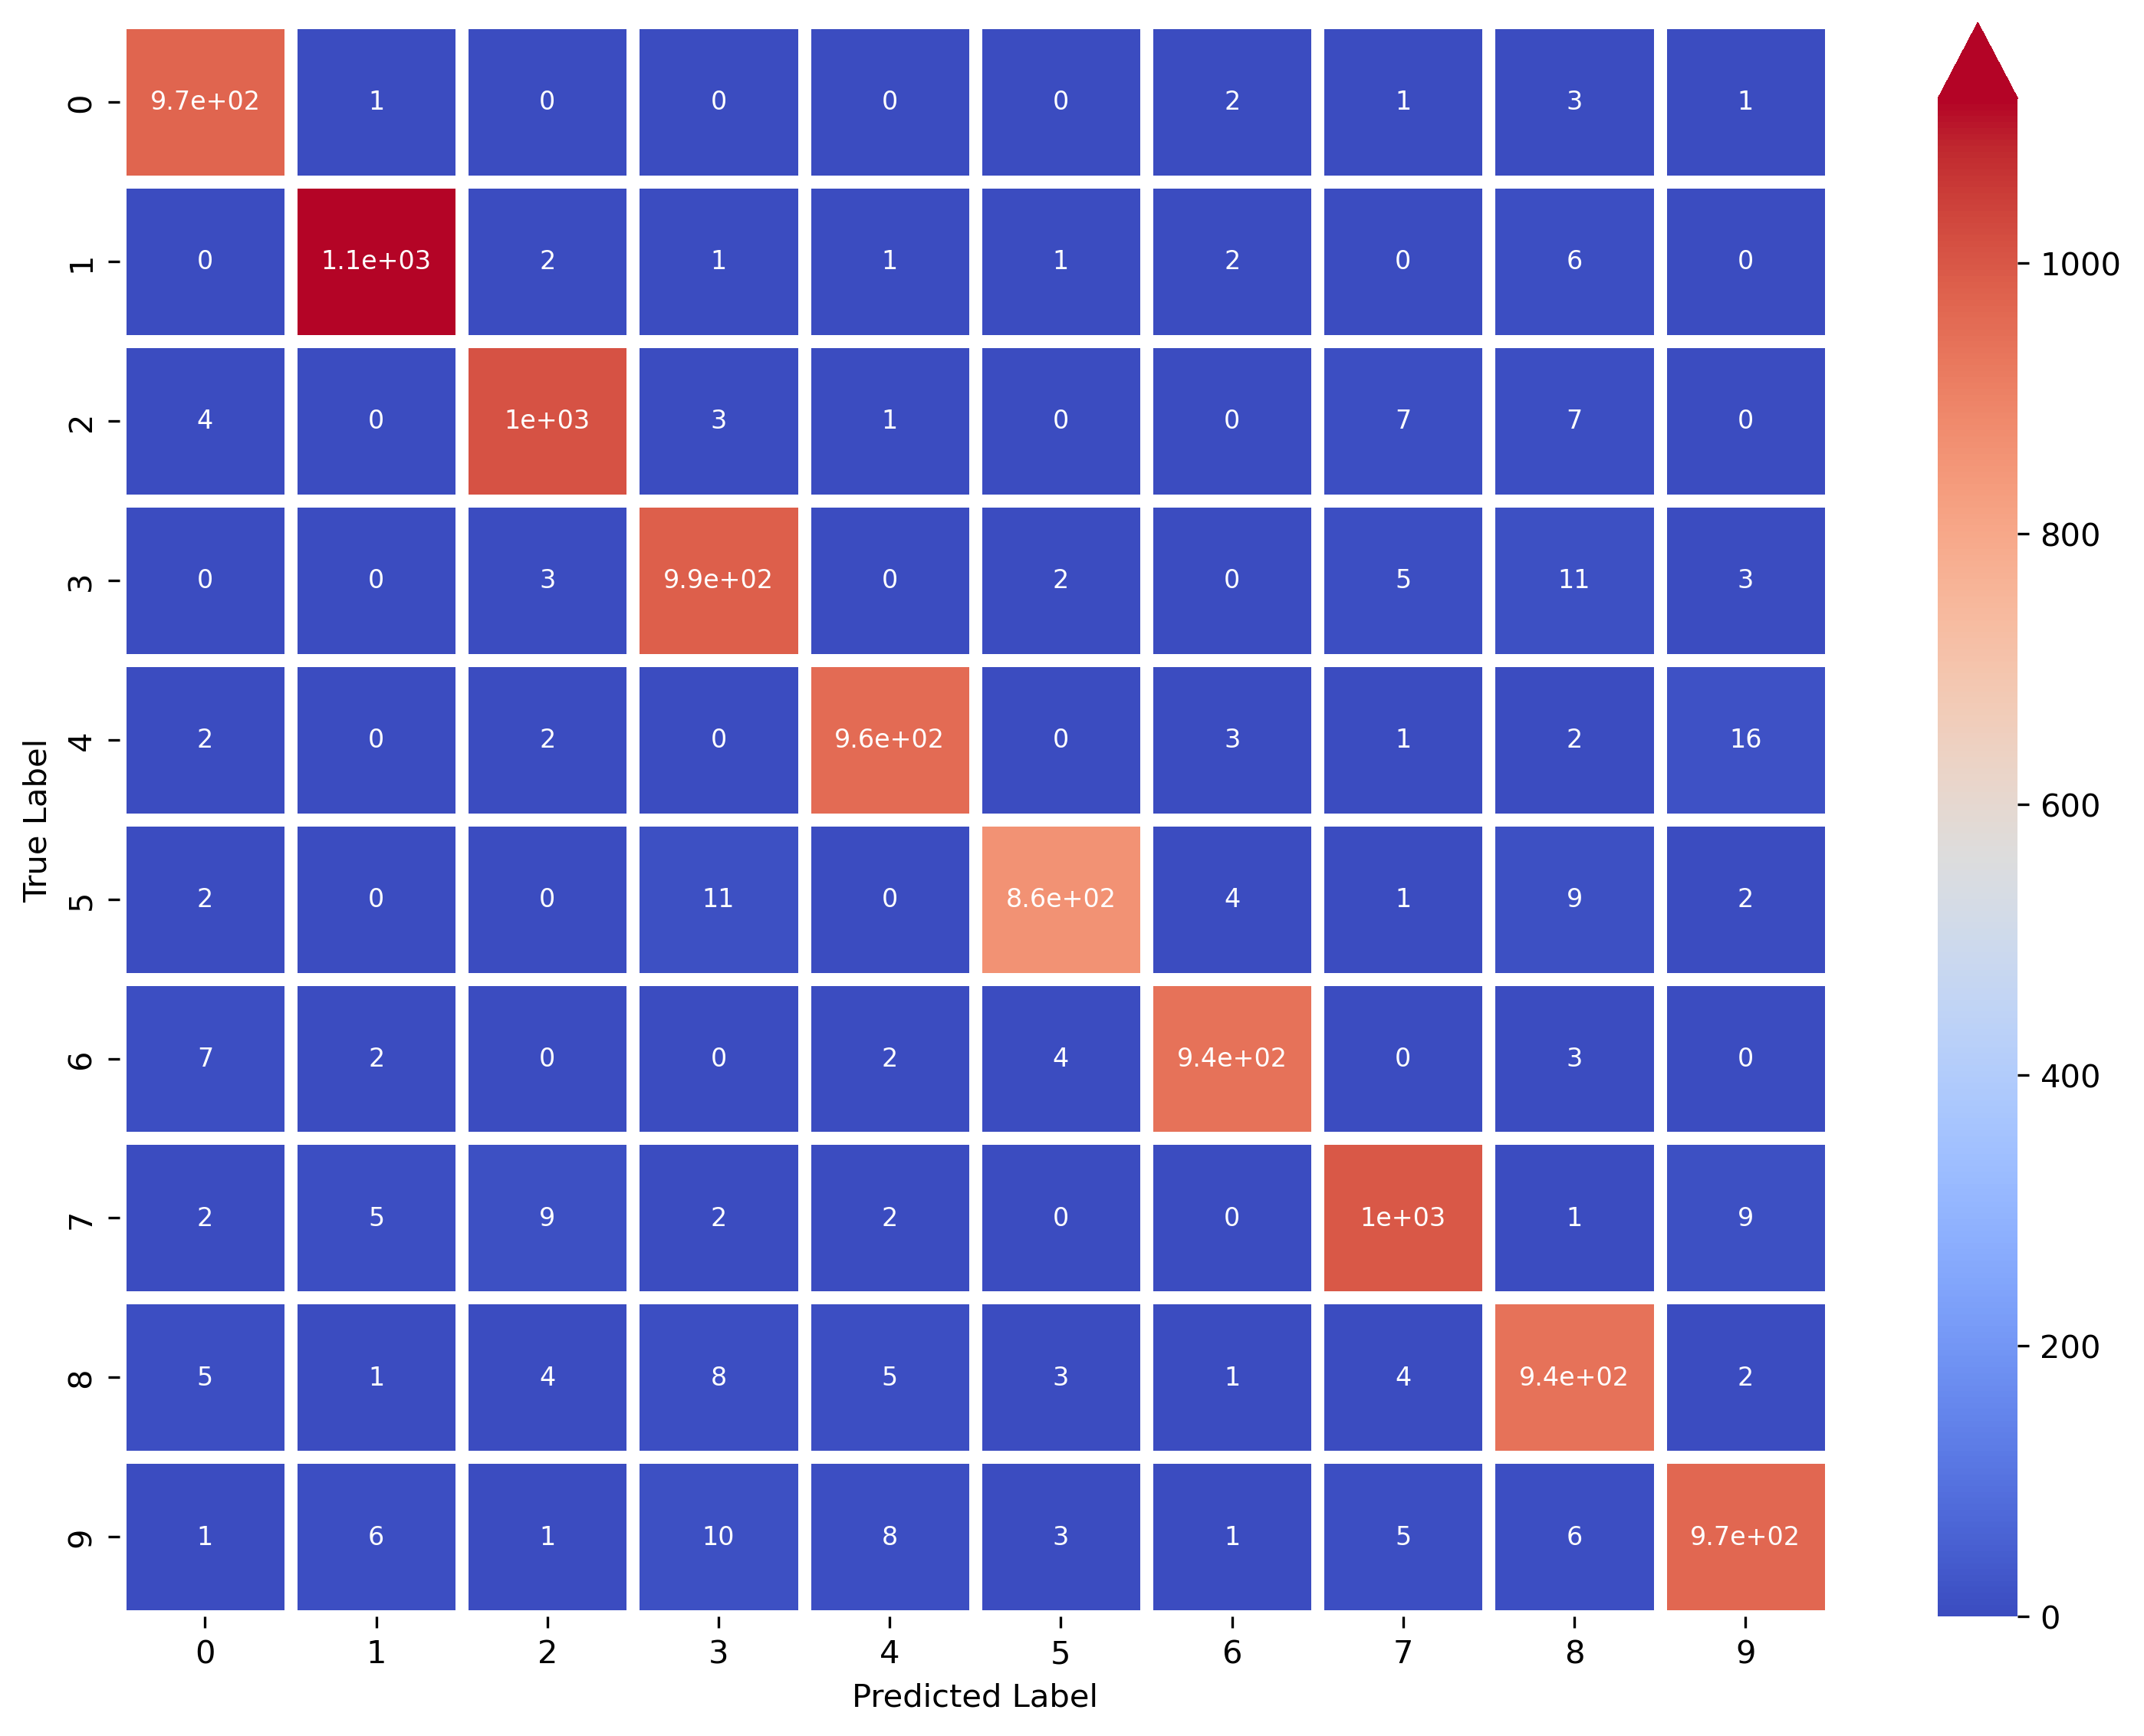

The training time of using sigmoid kernel is 2952.31 sec.

The score of using sigmoid kernel is 11.35%.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



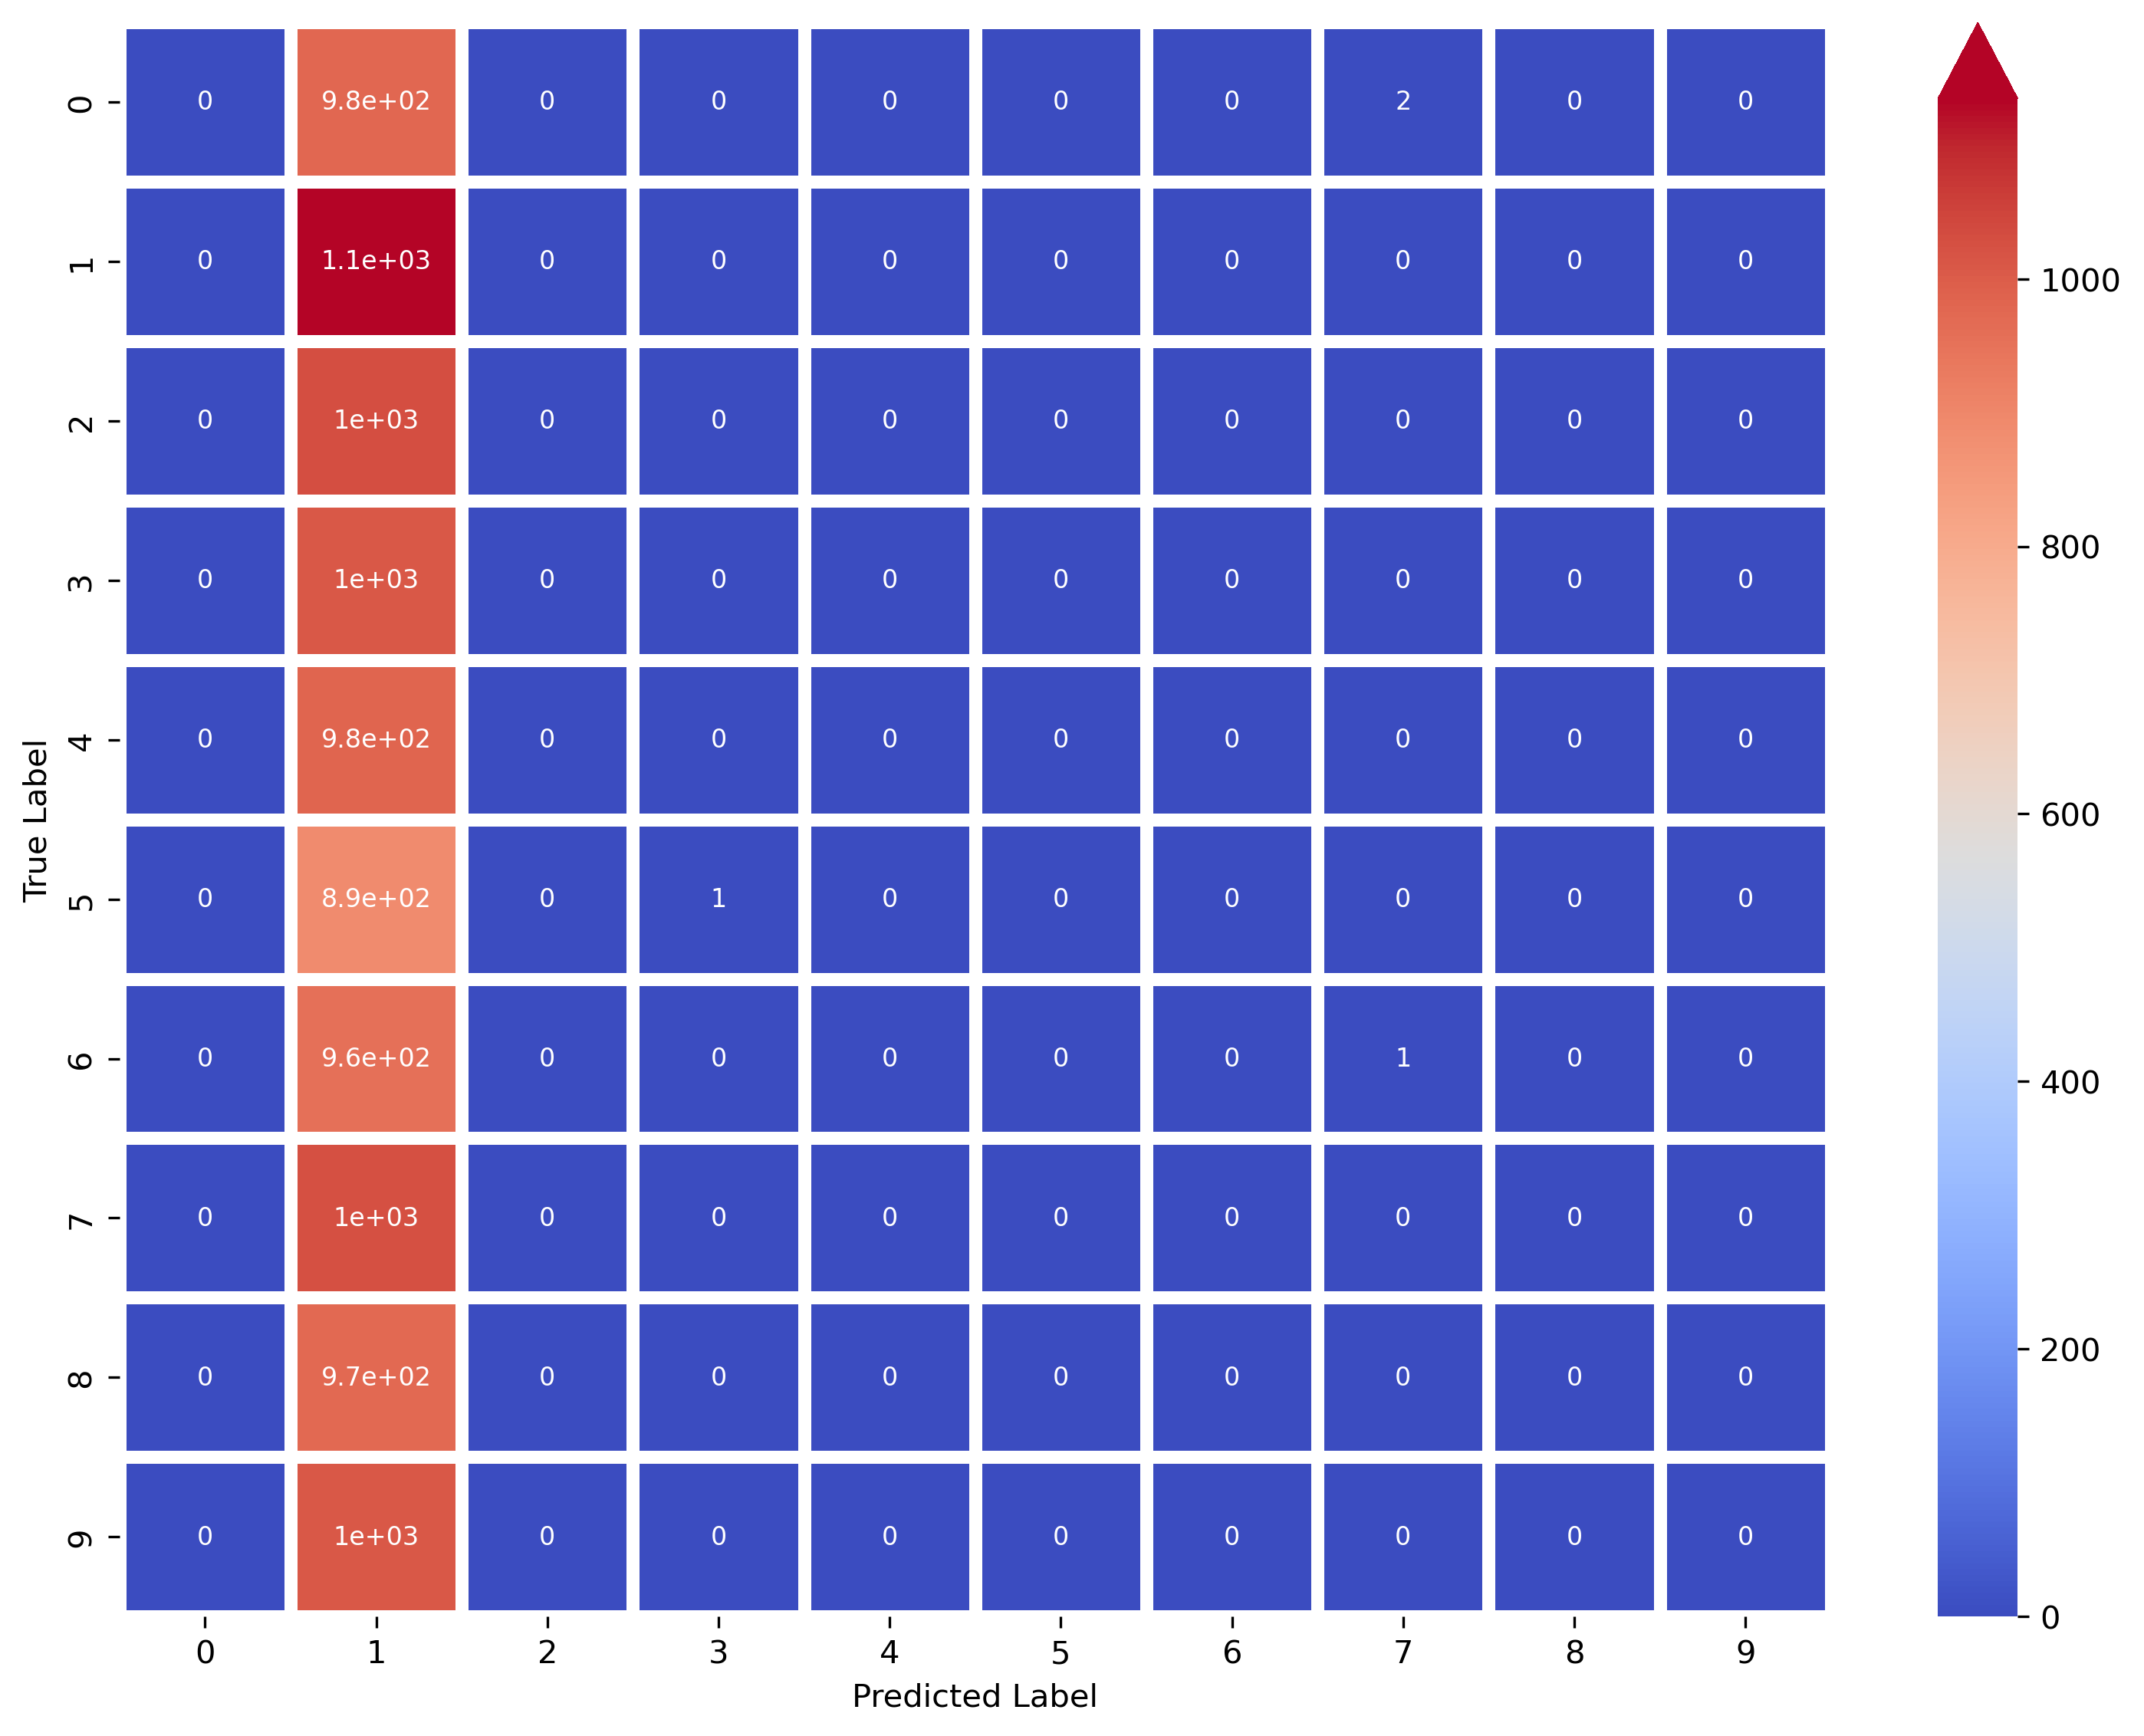

In [15]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas = [10, 10, 'scale', 10]
for kernel, gamma in zip(kernels, gammas):
    SVM = SVC(kernel=kernel, gamma=gamma)
    start = time()
    SVM.fit(train_imgs_2D, train_labels)
    end = time()
    test_labels_pred = SVM.predict(test_imgs_2D)
    score = SVM.score(test_imgs_2D, test_labels)
    print('The training time of using {} kernel is {:.2f} sec.\n'.format(kernel, end-start))
    print('The score of using {} kernel is {:.2f}%.\n'.format(kernel, score * 100))
    print(metrics.classification_report(test_labels, test_labels_pred))
    cm = confusion_matrix(test_labels, test_labels_pred)
    plt.figure(figsize=(12, 9), dpi=300)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    sns.heatmap(cm, linewidth=4, 
                annot=True, cmap='coolwarm', 
                annot_kws={'fontsize': 8,}, cbar_kws={'shrink': 1, 'extend': 'max'})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

We can see that we can reach a pretty good result using polynomial kernel and rbf kernel. The best accuracy is obtained by polynomial kernel, and the process of using polynomial kernel is the least time-consuming one. So the best choice is to use polynomial kernel when dealing with the MNIST dataset.